In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,classification_report,precision_score,recall_score,accuracy_score

In [2]:
df=pd.read_csv("emails.csv")
df

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [3]:
df.head(10)

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
5,Email 6,4,5,1,4,2,3,45,1,0,...,0,0,0,0,0,0,0,0,0,1
6,Email 7,5,3,1,3,2,1,37,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Email 8,0,2,2,3,1,2,21,6,0,...,0,0,0,0,0,0,0,1,0,1
8,Email 9,2,2,3,0,0,1,18,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Email 10,4,4,35,0,1,0,49,1,16,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.tail(10)

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
5162,Email 5163,2,3,1,2,1,2,32,0,0,...,0,0,0,0,0,0,0,0,0,1
5163,Email 5164,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
5164,Email 5165,21,18,3,1,6,4,106,1,2,...,0,0,0,0,0,0,0,0,0,0
5165,Email 5166,1,0,1,0,3,1,12,1,0,...,0,0,0,1,0,0,0,0,0,0
5166,Email 5167,1,0,1,1,0,0,4,0,0,...,0,0,0,0,0,0,0,0,0,1
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1
5171,Email 5172,22,24,5,1,6,5,148,8,2,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [6]:
df['Prediction'].value_counts()

Prediction
0    3672
1    1500
Name: count, dtype: int64

In [7]:
df=df.drop('Email No.',axis=1)

In [8]:
X=df.drop('Prediction',axis=1)

In [21]:
y=df['Prediction']

In [22]:
feature_scaling=MinMaxScaler()

In [23]:
x_scale=feature_scaling.fit_transform(X)

In [24]:
X_train,X_test,y_train,y_test=train_test_split(x_scale,y,test_size=0.20)

In [25]:
X_test = np.nan_to_num(X_test)

In [26]:
KNN=KNeighborsClassifier(n_neighbors=2)

In [27]:
KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [30]:
y_pred=KNN.predict(X_test)
res=pd.DataFrame()
res['Actual'],res['Predicted']=y_test,y_pred
res.sample(10)

,Actual,Predicted
3664,0,0
5058,0,0
1816,0,0
1581,0,0
4275,0,0
2595,0,0
3561,1,1
3082,1,0
2439,0,0
1171,0,0


In [31]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[678,  54],
       [ 49, 254]], dtype=int64)

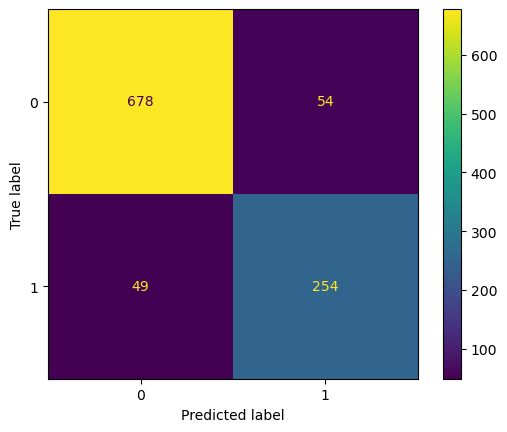

In [34]:
mat=ConfusionMatrixDisplay(confusion_matrix=cm)
mat.plot()
plt.show()

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       732
           1       0.82      0.84      0.83       303

    accuracy                           0.90      1035
   macro avg       0.88      0.88      0.88      1035
weighted avg       0.90      0.90      0.90      1035



In [40]:
print("Accuracy_score: ")
accuracy_score(y_test, y_pred)

Accuracy_score: 


0.9004830917874396

In [41]:
print("Precision_score: ")
precision_score(y_test, y_pred)

Precision_score: 


0.8246753246753247

In [42]:
print("Recall_score: ")
recall_score(y_test, y_pred)

Recall_score: 


0.8382838283828383

In [43]:
print("Error: ")
1-accuracy_score(y_test, y_pred)

Error: 


0.09951690821256043

In [44]:
SVM=SVC(gamma='auto')

In [45]:
SVM.fit(X_train,y_train)

SVC(gamma='auto')

In [47]:
y_pred=SVM.predict(X_test)
res1=pd.DataFrame()
res1['Actual'],res1['Predicted']=y_test,y_pred
res.sample(10)

,Actual,Predicted
4582,0,0
4884,1,1
3310,0,0
1353,0,0
3210,0,0
4320,1,1
3651,0,0
363,1,1
4915,0,0
4970,1,1


In [51]:
cm1=confusion_matrix(y_test,y_pred)
cm1

array([[732,   0],
       [299,   4]], dtype=int64)

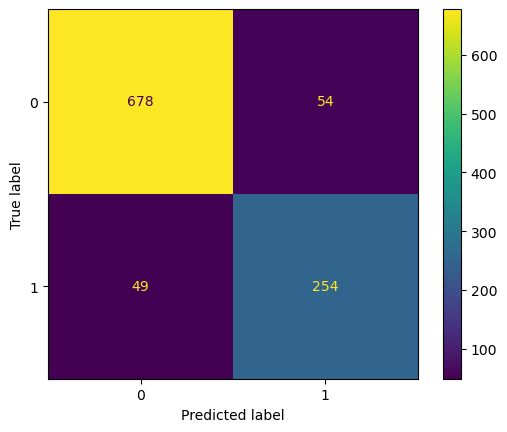

In [53]:
mat1=ConfusionMatrixDisplay(confusion_matrix=cm1)
mat.plot()
plt.show()

In [55]:
print("Classification Report")
print(classification_report(y_test,y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.71      1.00      0.83       732
           1       1.00      0.01      0.03       303

    accuracy                           0.71      1035
   macro avg       0.85      0.51      0.43      1035
weighted avg       0.79      0.71      0.59      1035



In [57]:
print("Precision_score: ")
precision_score(y_test, y_pred)

Precision_score: 


1.0

In [58]:
print("Recall_score: ")
recall_score(y_test, y_pred)

Recall_score: 


0.013201320132013201

In [59]:
print("Error: ")
1-accuracy_score(y_test, y_pred)

Error: 


0.28888888888888886